In [2]:
import pandas as pd

df_WorldCupMatches=pd.read_csv(r'C:\Users\91735\OneDrive\Desktop\analyst content\data\unified mentor\Fifa_World_Cup_Prediction\FIFA WC data\WorldCupMatches.csv')
df_WorldCupPlayers=pd.read_csv(r'C:\Users\91735\OneDrive\Desktop\analyst content\data\unified mentor\Fifa_World_Cup_Prediction\FIFA WC data\WorldCupPlayers.csv')
df_WorldCups=pd.read_csv(r'C:\Users\91735\OneDrive\Desktop\analyst content\data\unified mentor\Fifa_World_Cup_Prediction\FIFA WC data\WorldCups.csv')

In [3]:
# Data Cleaning

# Dropping rows with missing values in critical columns of the WorldCupMatches dataset
world_cup_matches_cleaned = df_WorldCupMatches.dropna(subset=['Year', 'Home Team Name', 'Away Team Name', 'Home Team Goals', 'Away Team Goals'])

# Dropping rows with missing values in critical columns of the WorldCupPlayers dataset
world_cup_players_cleaned = df_WorldCupPlayers.dropna(subset=['Player Name', 'Team Initials', 'Coach Name'])

# Summary statistics for the WorldCups dataset
summary_stats_world_cups = df_WorldCups.describe(include='all')
df_WorldCups_cleaned=df_WorldCups.copy()
df_WorldCups_cleaned['Attendance']=df_WorldCups['Attendance'].str.replace('.', '', regex=False)
df_WorldCups_cleaned['Attendance'] = df_WorldCups_cleaned['Attendance'].astype(int)

In [14]:
df_WorldCupPlayers['MatchID'].value_counts().reset_index()
temp=world_cup_matches_cleaned['MatchID'].value_counts().reset_index()
temp=temp[temp['count']>1]
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MatchID  16 non-null     float64
 1   count    16 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 384.0 bytes


# Home Advantage

In [22]:
goals_scored_per_tour=world_cup_matches_cleaned.groupby('Year')[['Home Team Goals','Away Team Goals']].sum().reset_index()
goals_scored_per_tour.head()

,Year,Home Team Goals,Away Team Goals
0,1930.0,59.0,11.0
1,1934.0,48.0,22.0
2,1938.0,61.0,23.0
3,1950.0,69.0,19.0
4,1954.0,109.0,31.0


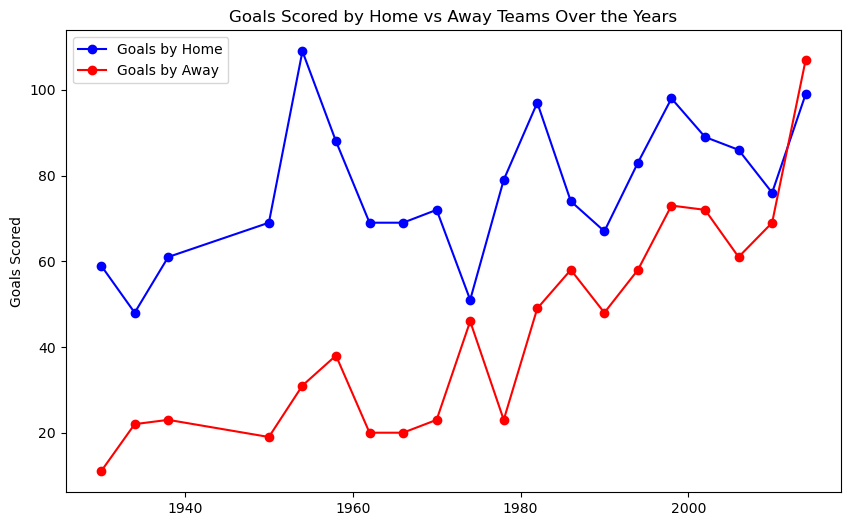

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot both lines
plt.plot(goals_scored_per_tour['Year'], goals_scored_per_tour['Home Team Goals'], label='Goals by Home', marker='o', linestyle='-', color='blue')
plt.plot(goals_scored_per_tour['Year'], goals_scored_per_tour['Away Team Goals'], label='Goals by Away', marker='o', linestyle='-', color='red')

# Add title and labels
plt.title('Goals Scored by Home vs Away Teams Over the Years')
plt.xlabel('')
plt.ylabel('Goals Scored')

# Add a legend
plt.legend()

# Show the plot
plt.grid(False)
plt.show()

In [30]:
# Create the home team DataFrame
home_df = world_cup_matches_cleaned[['Year', 'Home Team Name', 'Home Team Goals']].copy()
home_df.rename(columns={'Home Team Name': 'team', 'Home Team Goals': 'goals_scored'}, inplace=True)
home_df['home_or_away'] = 'home'

# Create the away team DataFrame
away_df = world_cup_matches_cleaned[['Year', 'Away Team Name', 'Away Team Goals']].copy()
away_df.rename(columns={'Away Team Name': 'team', 'Away Team Goals': 'goals_scored'}, inplace=True)
away_df['home_or_away'] = 'away'

total_goals_df = pd.concat([home_df, away_df])

# Group by year and team to calculate the total goals scored
total_goals_df = total_goals_df.groupby(['Year', 'team', 'home_or_away'], as_index=False)['goals_scored'].sum()

# Sort by year and team (optional)
total_goals_df = total_goals_df.sort_values(by=['Year'])

total_goals_df.head(20)

,Year,team,home_or_away,goals_scored
0,1930.0,Argentina,away,2.0
20,1930.0,Yugoslavia,home,6.0
19,1930.0,Yugoslavia,away,1.0
18,1930.0,Uruguay,home,15.0
17,1930.0,USA,home,6.0
16,1930.0,USA,away,1.0
14,1930.0,Romania,away,0.0
13,1930.0,Peru,away,1.0
12,1930.0,Paraguay,home,1.0
11,1930.0,Paraguay,away,0.0


In [31]:
total_goals_scored_by_each_team=total_goals_df.groupby(['Year','team'])['goals_scored'].sum().reset_index()
total_goals_scored_by_each_team

,Year,team,goals_scored
0,1930.0,Argentina,18.0
1,1930.0,Belgium,0.0
2,1930.0,Bolivia,0.0
3,1930.0,Brazil,5.0
4,1930.0,Chile,5.0
...,...,...,...
422,2014.0,Spain,4.0
423,2014.0,Switzerland,7.0
424,2014.0,USA,6.0
425,2014.0,Uruguay,4.0


In [38]:
df_WorldCups_cleaned

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


# Goals Comparision between Teams 

In [39]:
# Merge DataFrame 1 with DataFrame 2 on 'year' and 'teams'
def merge_team_goals(df1, df2, position):
    # Create a temporary DataFrame for each position
    temp_df = df2[['Year', position]].rename(columns={position: 'team'})
    
    # Merge with df1 to get the total goals scored
    result_df = pd.merge(df1, temp_df, on=['Year', 'team'], how='right')
    
    # Rename columns to include position
    result_df = result_df[['Year', 'team', 'goals_scored']]
    result_df = result_df.rename(columns={'goals_scored': f'{position}_total_goal_scored'})
    
    return result_df

# Merge for each position
winner_goals = merge_team_goals(total_goals_scored_by_each_team, df_WorldCups_cleaned, 'Winner')
runnerup_goals = merge_team_goals(total_goals_scored_by_each_team, df_WorldCups_cleaned, 'Runners-Up')
third_goals = merge_team_goals(total_goals_scored_by_each_team, df_WorldCups_cleaned, 'Third')
fourth_goals = merge_team_goals(total_goals_scored_by_each_team, df_WorldCups_cleaned, 'Fourth')





In [46]:
winner_goals.rename(columns={'team':'winner'},inplace=True)
runnerup_goals.rename(columns={'team':'runner_up'},inplace=True)
third_goals.rename(columns={'team':'third'},inplace=True)
fourth_goals.rename(columns={'team':'fourth'},inplace=True)

In [47]:
merged_df=winner_goals.merge(runnerup_goals,on='Year',how='inner')
merged_df=merged_df.merge(third_goals,on='Year',how='inner')
merged_df=merged_df.merge(fourth_goals,on='Year',how='inner')
merged_df

,Year,winner,Winner_total_goal_scored,runner_up,Runners-Up_total_goal_scored,third,Third_total_goal_scored,fourth,Fourth_total_goal_scored
0,1930.0,Uruguay,15.0,Argentina,18.0,USA,7.0,Yugoslavia,7.0
1,1934.0,Italy,12.0,Czechoslovakia,9.0,Germany,11.0,Austria,7.0
2,1938.0,Italy,11.0,Hungary,15.0,Brazil,14.0,Sweden,11.0
3,1950.0,Uruguay,15.0,Brazil,22.0,Sweden,11.0,Spain,10.0
4,1954.0,Germany FR,25.0,Hungary,27.0,Austria,17.0,Uruguay,16.0
5,1958.0,Brazil,16.0,Sweden,12.0,France,23.0,Germany FR,12.0
6,1962.0,Brazil,14.0,Czechoslovakia,7.0,Chile,10.0,Yugoslavia,10.0
7,1966.0,England,11.0,Germany FR,15.0,Portugal,17.0,Soviet Union,10.0
8,1970.0,Brazil,19.0,Italy,10.0,Germany FR,17.0,Uruguay,4.0
9,1974.0,Germany FR,13.0,Netherlands,15.0,Poland,16.0,Brazil,6.0


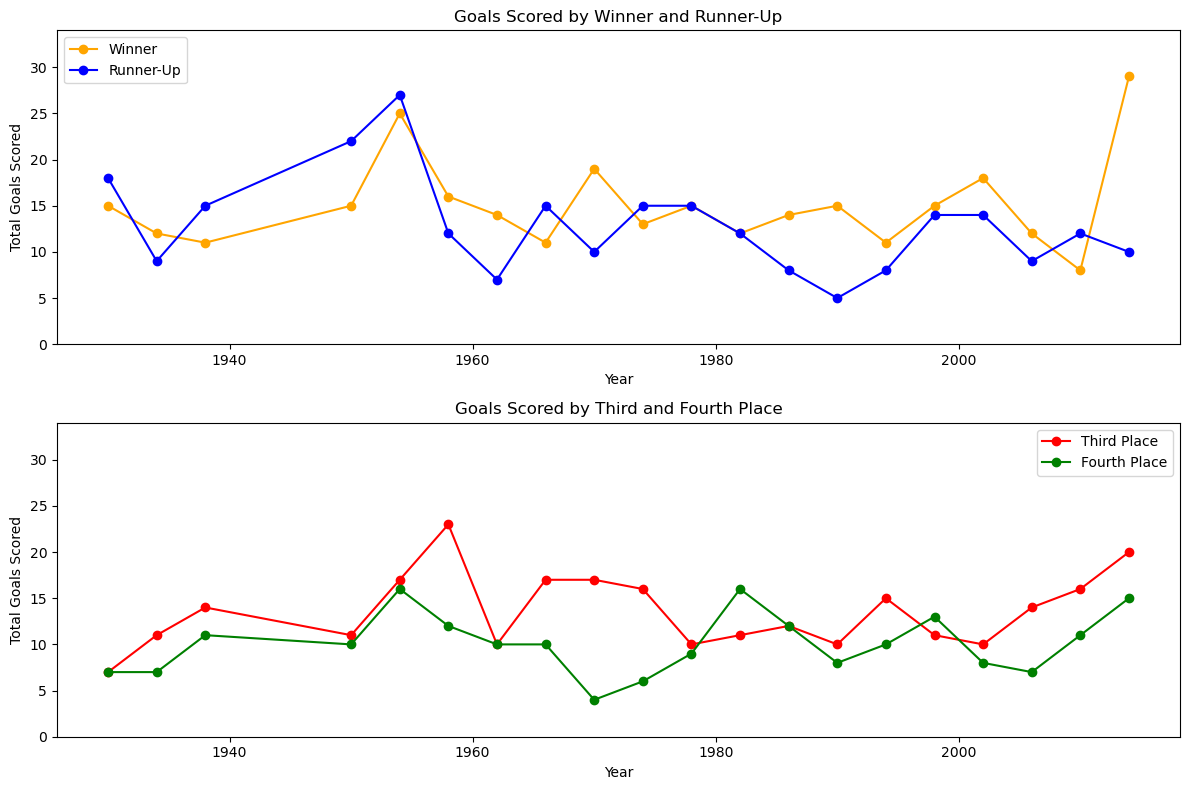

In [50]:
plt.figure(figsize=(12, 8))

# Set a common y-axis limit based on the maximum goal scored across all teams
y_limit = max(merged_df[['Winner_total_goal_scored', 'Runners-Up_total_goal_scored', 'Third_total_goal_scored', 'Fourth_total_goal_scored']].max()) + 5

# First subplot: Winner and Runner-Up
plt.subplot(2, 1, 1)
plt.plot(merged_df['Year'], merged_df['Winner_total_goal_scored'], marker='o', label='Winner',color='orange')
plt.plot(merged_df['Year'], merged_df['Runners-Up_total_goal_scored'], marker='o', label='Runner-Up',color='blue')
plt.ylim(0, y_limit)  # Set the y-axis limit to the common range
plt.xlabel('Year')
plt.ylabel('Total Goals Scored')
plt.title('Goals Scored by Winner and Runner-Up')
plt.legend()
plt.grid(False)

# Second subplot: Third Place and Fourth Place
plt.subplot(2, 1, 2)
plt.plot(merged_df['Year'], merged_df['Third_total_goal_scored'], marker='o', label='Third Place',color='red')
plt.plot(merged_df['Year'], merged_df['Fourth_total_goal_scored'], marker='o', label='Fourth Place',color='green')
plt.ylim(0, y_limit)  # Set the y-axis limit to the common range
plt.xlabel('Year')
plt.ylabel('Total Goals Scored')
plt.title('Goals Scored by Third and Fourth Place')
plt.legend()
plt.grid(False)


plt.tight_layout()


plt.show()


# Knock-Out Matches Analysis

In [52]:
stages_to_keep = ['Final', 'Semi-finals', 'Match for third place', 'Play-off for third place']
df_knock_out_matches_filtered = world_cup_matches_cleaned[world_cup_matches_cleaned['Stage'].isin(stages_to_keep)]

In [53]:
df_knock_out_matches_filtered.head(15)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
15,1930.0,26 Jul 1930 - 14:45,Semi-finals,Estadio Centenario,Montevideo,Argentina,6.0,1.0,USA,,72886.0,1.0,0.0,LANGENUS Jean (BEL),VALLEJO Gaspar (MEX),WARNKEN Alberto (CHI),202.0,1088.0,ARG,USA
16,1930.0,27 Jul 1930 - 14:45,Semi-finals,Estadio Centenario,Montevideo,Uruguay,6.0,1.0,Yugoslavia,,79867.0,3.0,1.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),BALWAY Thomas (FRA),202.0,1101.0,URU,YUG
17,1930.0,30 Jul 1930 - 14:15,Final,Estadio Centenario,Montevideo,Uruguay,4.0,2.0,Argentina,,68346.0,1.0,2.0,LANGENUS Jean (BEL),SAUCEDO Ulises (BOL),CRISTOPHE Henry (BEL),405.0,1087.0,URU,ARG
31,1934.0,03 Jun 1934 - 16:30,Semi-finals,San Siro,Milan,Italy,1.0,0.0,Austria,,35000.0,1.0,0.0,EKLIND Ivan (SWE),BAERT Louis (BEL),ZENISEK Bohumil (TCH),3492.0,1107.0,ITA,AUT
32,1934.0,03 Jun 1934 - 16:30,Semi-finals,Nazionale PNF,Rome,Czechoslovakia,3.0,1.0,Germany,,15000.0,1.0,0.0,BARLASSINA Rinaldo (ITA),BERANEK Alois (AUT),ESCARTIN Pedro (ESP),3492.0,1130.0,TCH,GER
33,1934.0,07 Jun 1934 - 18:00,Match for third place,Giorgio Ascarelli,Naples,Germany,3.0,2.0,Austria,,7000.0,3.0,1.0,CARRARO Albino (ITA),CAIRONI Camillo (ITA),ESCARTIN Pedro (ESP),3491.0,1105.0,GER,AUT
34,1934.0,10 Jun 1934 - 17:30,Final,Nazionale PNF,Rome,Italy,2.0,1.0,Czechoslovakia,Italy win after extra time,55000.0,0.0,0.0,EKLIND Ivan (SWE),BAERT Louis (BEL),IVANCSICS Mihaly (HUN),3490.0,1134.0,ITA,TCH
49,1938.0,16 Jun 1938 - 18:00,Semi-finals,Parc des Princes,Paris,Hungary,5.0,1.0,Sweden,,20000.0,3.0,1.0,LECLERCQ Lucien (FRA),VAN MOORSEL Johannes (NED),SCARPI Giuseppe (ITA),3489.0,1176.0,HUN,SWE
50,1938.0,16 Jun 1938 - 18:00,Semi-finals,Stade V�lodrome,Marseilles,Italy,2.0,1.0,Brazil,,33000.0,0.0,0.0,WUETHRICH Hans (SUI),BERANEK Alois (AUT),MARENCO Paul (FRA),3489.0,1149.0,ITA,BRA
51,1938.0,19 Jun 1938 - 17:00,Match for third place,Stade du Parc Lescure,Bordeaux,Brazil,4.0,2.0,Sweden,,12000.0,1.0,2.0,LANGENUS Jean (BEL),OLIVE D. (FRA),VALPREDE Ferdinand (FRA),3488.0,1151.0,BRA,SWE
